## Diamonds
### Analyze diamonds by their cut, color, clarity, price, and other attributes

In [442]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [443]:
df_diamonds = pd.read_csv('datasets/diamonds.csv')
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [444]:
df_diamonds.drop(columns={"Unnamed: 0"}, inplace=True)

In [113]:
df_diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [114]:
df_diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Attributes

* ***price*** price in US dollars (\$326--\$18,823)

* ***carat*** weight of the diamond (0.2--5.01)

* ***cut*** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* ***color*** diamond colour, from J (worst) to D (best)

* ***clarity*** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* ***x*** length in mm (0--10.74)

* ***y*** width in mm (0--58.9)

* ***z*** depth in mm (0--31.8)

* ***depth*** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* ***table*** width of top of diamond relative to widest point (43--95)

### Exibe as 10 primeiras linhas do dataset

In [115]:
df_diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Os ultimos 10 

In [116]:
df_diamonds.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Existe valor nulo

In [117]:
df_diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Type class cut | color | clarity

In [118]:
print('CUT: ', df_diamonds['cut'].unique())
print('COLOR: ', df_diamonds['color'].unique())
print('CLARITY: ', df_diamonds['clarity'].unique())

CUT:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
COLOR:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
CLARITY:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Exploratory Analysis

Attr: Carat
Max : 5.01
Min : 0.2
Variance: 0.22468665982277333
Std : 0.4740112444054184
mean : 0.7979397478680014
median : 0.7
mode: 0    0.3
dtype: float64
1 quartile 25%: 0.4
2 quartile 50%: 0.7
3 quartile 75%: 1.04

IQR: 0.64

Histogram = Positive skewed | prox normal


<AxesSubplot:>

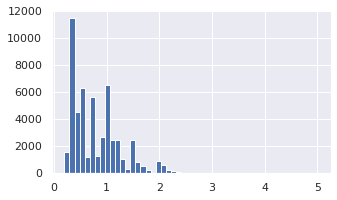

In [119]:
print('Attr: Carat')
df_attr = df_diamonds["carat"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print(f'IQR: {df_attr.quantile(q=0.75)-df_attr.quantile(q=0.25)}\n')
print('Histogram = Positive skewed | prox normal')
df_attr.hist(figsize=(5,3), bins=50)

Attr: Depth
Max : 79.0
Min : 43.0
Variance: 2.0524038431766978
Std : 1.432621318833661
mean : 61.749404894327036
median : 61.8
mode: 0    62.0
dtype: float64
1 quartile 25%: 61.0
2 quartile 50%: 61.8
3 quartile 75%: 62.5

Histogram = Positive skewed


<AxesSubplot:>

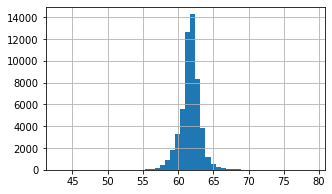

In [18]:
print('Attr: Depth')
df_attr = df_diamonds["depth"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3), bins=50)

Attr: Table
Max : 95.0
Min : 43.0
Variance: 4.9929480753375515
Std : 2.2344905628213225
mean : 57.45718390804598
median : 57.0
mode: 0    56.0
dtype: float64
1 quartile 25%: 56.0
2 quartile 50%: 57.0
3 quartile 75%: 59.0

Histogram = Positive skewed


<AxesSubplot:>

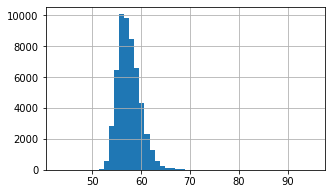

In [23]:
print('Attr: Table')
df_attr = df_diamonds["table"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3), bins=50)

Attr: Price
Max : 18823
Min : 326
Variance: 15915629.42430145
Std : 3989.439738146379
mean : 3932.799721913237
median : 2401.0
mode: 0    605
dtype: int64
1 quartile 25%: 950.0
2 quartile 50%: 2401.0
3 quartile 75%: 5324.25

Histogram = Negatively skewed


<AxesSubplot:>

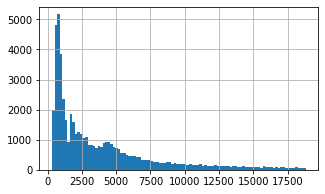

In [26]:
print('Attr: Price')
df_attr = df_diamonds["price"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Negatively skewed')
df_attr.hist(figsize=(5,3), bins=100)

In [ ]:
print('Attr: X')
df_attr = df_diamonds["x"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Y
Max : 58.9
Min : 0.0
Variance: 1.3044716138353198
Std : 1.1421346741235552
mean : 5.734525954764553
median : 5.71
mode: 0    4.34
dtype: float64
1 quartile 25%: 4.72
2 quartile 50%: 5.71
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

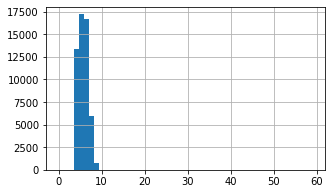

In [29]:
print('Attr: Y')
df_attr = df_diamonds["y"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3), bins=50)

Attr: Z
Max : 31.8
Min : 0.0
Variance: 0.4980108625865512
Std : 0.7056988469499941
mean : 3.5387337782721544
median : 3.53
mode: 0    2.7
dtype: float64
1 quartile 25%: 2.91
2 quartile 50%: 3.53
3 quartile 75%: 4.04

Histogram = Positive skewed


<AxesSubplot:>

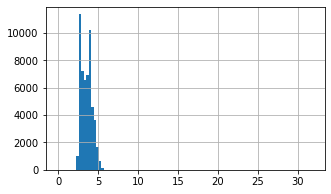

In [32]:
print('Attr: Z')
df_attr = df_diamonds["z"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3), bins=100)

### Boxplot

<AxesSubplot:xlabel='carat'>

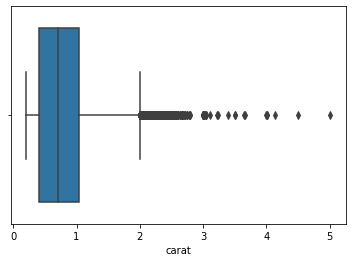

In [33]:
sns.boxplot(x=df_diamonds["carat"])

<AxesSubplot:xlabel='depth'>

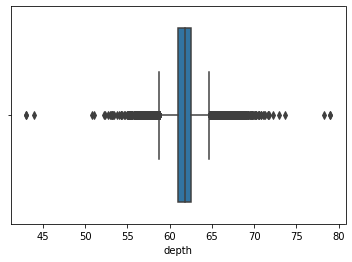

In [34]:
sns.boxplot(x=df_diamonds["depth"])

<AxesSubplot:xlabel='table'>

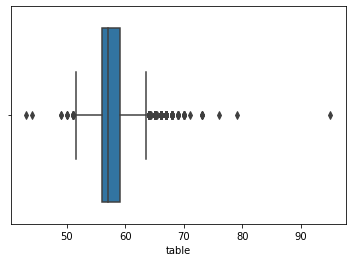

In [35]:
sns.boxplot(x=df_diamonds["table"])

<AxesSubplot:xlabel='x'>

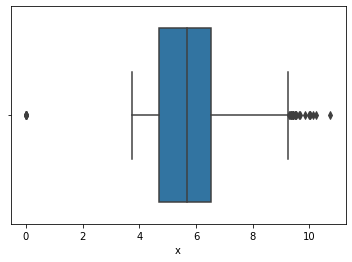

In [36]:
sns.boxplot(x=df_diamonds["x"])

<AxesSubplot:xlabel='y'>

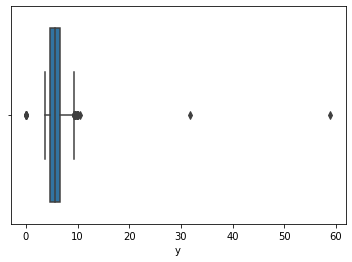

In [37]:
sns.boxplot(x=df_diamonds["y"])

<AxesSubplot:xlabel='z'>

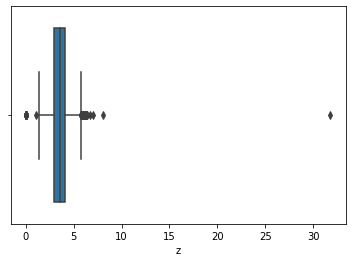

In [38]:
sns.boxplot(x=df_diamonds["z"])

### Heatmap

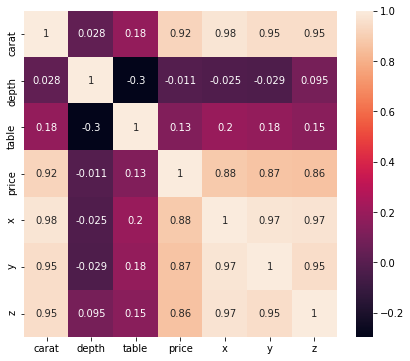

In [39]:
plt.figure(figsize=(7,6))
correlation = df_diamonds.corr()
sns.heatmap(correlation, annot=True)
plt.show()

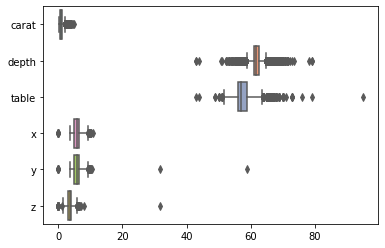

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


usecols = ["carat","depth","table","x","y","z","cut"]
df_diamonds = pd.read_csv('datasets/diamonds.csv',usecols=usecols)
ax = sns.boxplot(data=df_diamonds, orient="h", palette="Set2")

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
usecols = ["carat","depth","table","x","y","z","price"]
df_diamonds = pd.read_csv('datasets/diamonds.csv',usecols=usecols)
df_diamonds = scaler.fit_transform(df_diamonds)


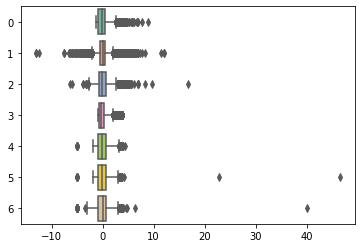

In [42]:
ax = sns.boxplot(data=df_diamonds, orient="h", palette="Set2")

## Início Minhas Análises

### Distribuições

In [229]:
order = {
    "cut": ["Ideal","Premium", "Very Good", "Good", "Fair"],
    "clarity": ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"],
    "color": ["D","E","F","G","H","I","J"]
}

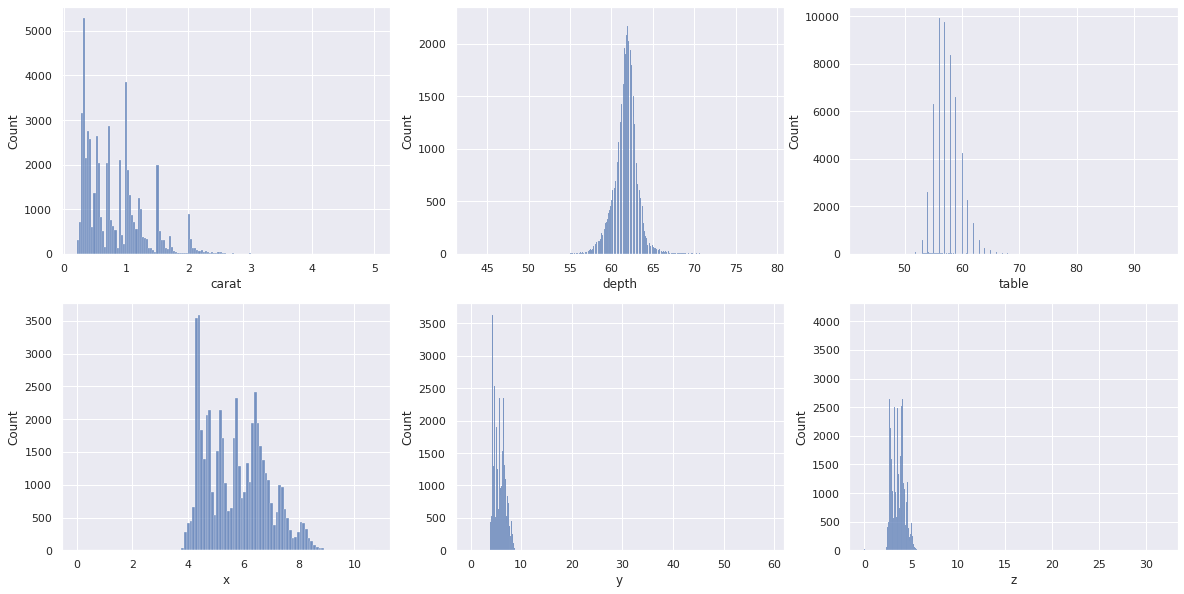

In [279]:
usecols = ['carat', 'depth', 'table', 'x', 'y', 'z']
nrows, ncols = 2, 3
plt.subplots(figsize=(20,10))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(data=df_diamonds[col])

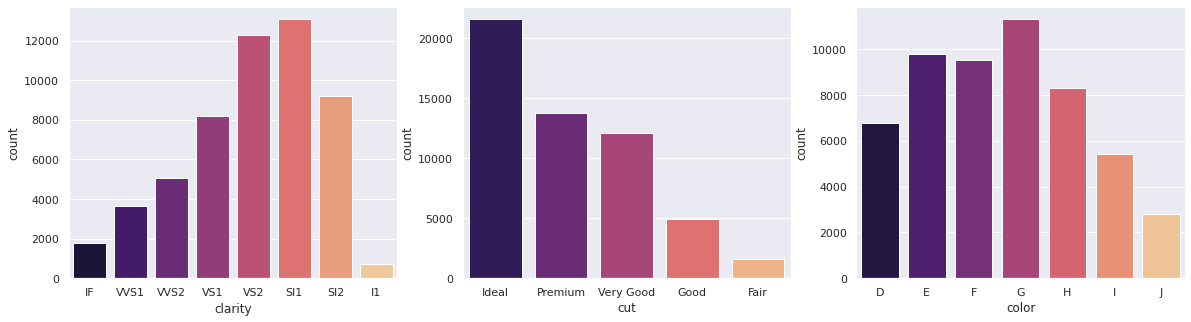

In [260]:
usecols = ['clarity', 'cut', 'color']
nrows, ncols = 1, 3
plt.subplots(figsize=(20,5))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(x=col, data=df_diamonds, palette='magma', order=order[col])

<AxesSubplot:xlabel='carat', ylabel='Density'>

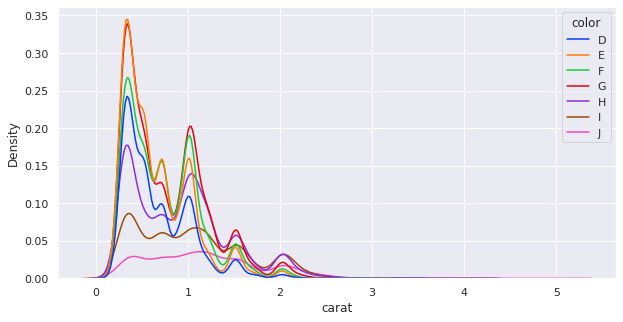

In [322]:
plt.subplots(figsize=(10,5))
sns.kdeplot(x=df_diamonds['carat'], data=df_diamonds, hue='color', hue_order=order['color'], 
            palette='bright', multiple="layer")

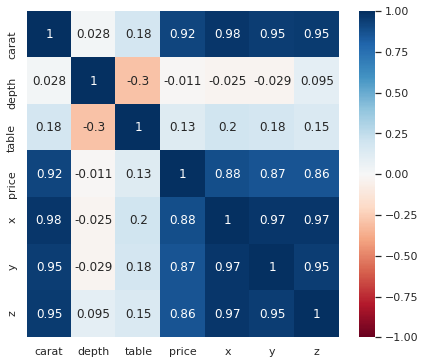

In [343]:
plt.figure(figsize=(7,6))
correlation = df_diamonds.corr()
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

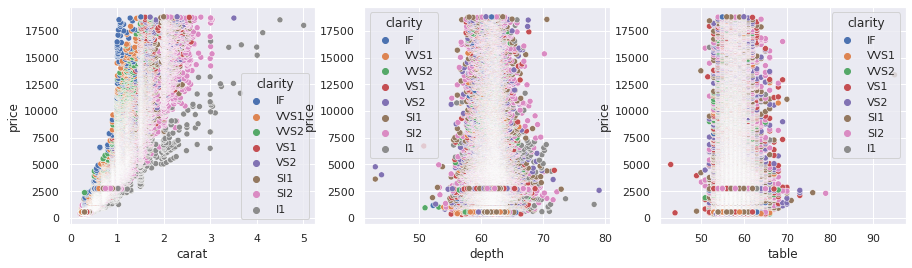

In [356]:
usecols = ['carat', 'depth', 'table']
nrows, ncols = 1, 3
plt.subplots(figsize=(15,4))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    sns.scatterplot(x=col, y="price", data=df_diamonds, hue="clarity", hue_order=order['clarity'])

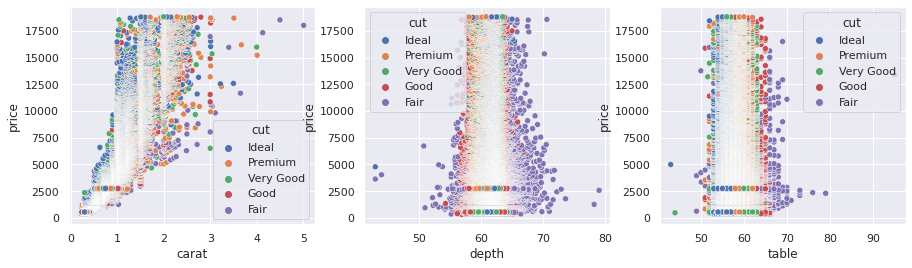

In [357]:
usecols = ['carat', 'depth', 'table']
nrows, ncols = 1, 3
plt.subplots(figsize=(15,4))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    sns.scatterplot(x=col, y="price", data=df_diamonds, hue="cut", hue_order=order['cut'])

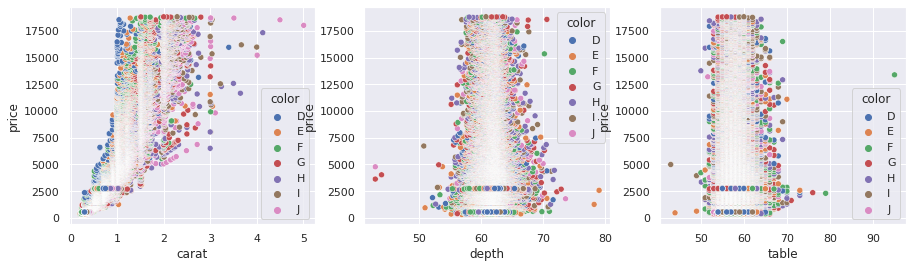

In [358]:
usecols = ['carat', 'depth', 'table']
nrows, ncols = 1, 3
plt.subplots(figsize=(15,4))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    sns.scatterplot(x=col, y="price", data=df_diamonds, hue="color", hue_order=order['color'])

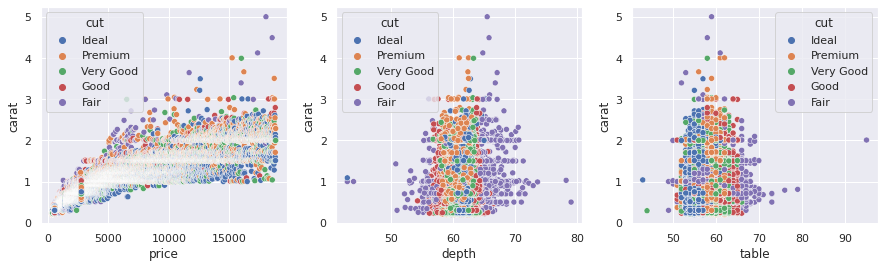

In [360]:
usecols = ['price', 'depth', 'table']
nrows, ncols = 1, 3
plt.subplots(figsize=(15,4))
for i, col in enumerate(usecols, 1):
    plt.subplot(nrows, ncols, i)
    sns.scatterplot(x=col, y="carat", data=df_diamonds, hue="cut", hue_order=order['cut'])

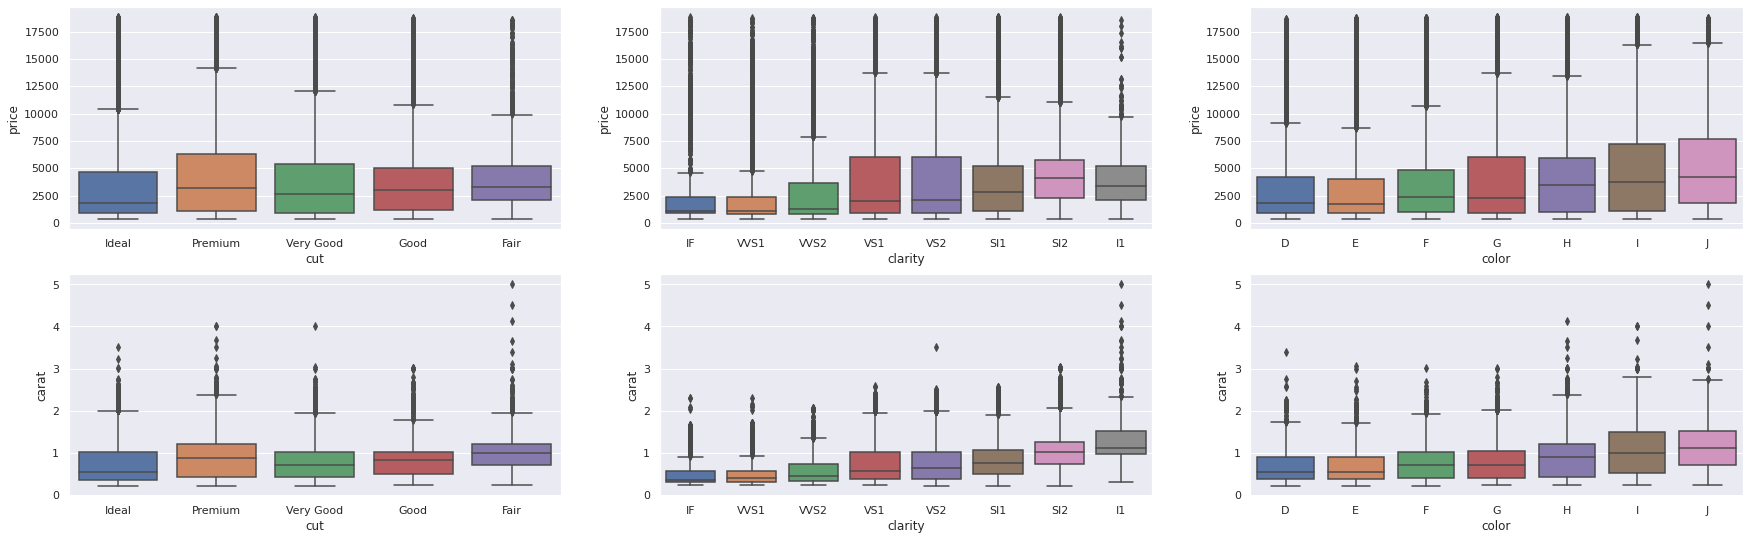

In [368]:
target_feature="price"
nrows, ncols = 2, 3
plt.figure(figsize=(30,9))
for i, row in enumerate(["price","carat"]):
    for j, col in enumerate(["cut","clarity","color"], 1):
        plt.subplot(nrows, ncols, (i*ncols) + j)
        sns.boxplot(data=df_diamonds, x=col, y=row, order=order[col])

#### Carat X Price

<AxesSubplot:xlabel='carat', ylabel='price'>

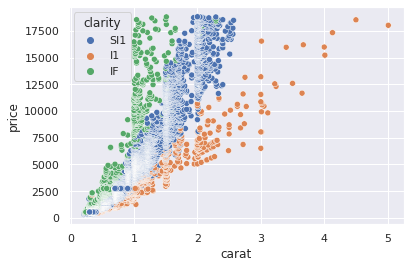

In [285]:
sns.scatterplot(x="carat", y="price", hue="clarity", data=df_diamonds[(df_diamonds['clarity']=='SI1') | (df_diamonds['clarity']=='IF') | (df_diamonds['clarity']=='I1')])

<AxesSubplot:xlabel='carat', ylabel='price'>

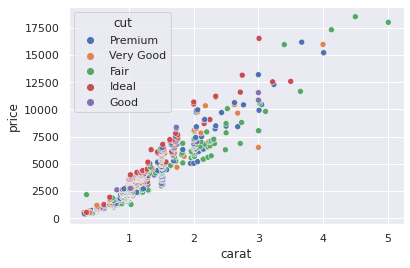

In [287]:
sns.scatterplot(x="carat", y="price", hue="cut", data=df_diamonds[df_diamonds["clarity"]=="I1"])

<AxesSubplot:xlabel='carat', ylabel='price'>

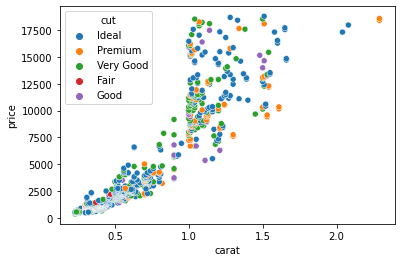

In [56]:
sns.scatterplot(x="carat", y="price", hue="cut", data=df_diamonds[df_diamonds["clarity"]=="IF"])

<AxesSubplot:xlabel='carat', ylabel='price'>

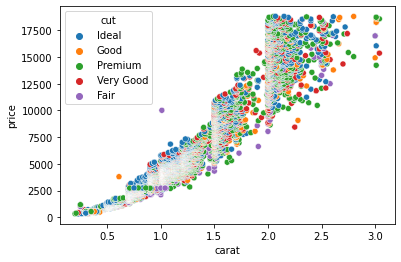

In [57]:
sns.scatterplot(x="carat", y="price", hue="cut", data=df_diamonds[df_diamonds["clarity"]=="SI2"])

#### Depth X Price

#### Table X Price

<AxesSubplot:xlabel='table', ylabel='depth'>

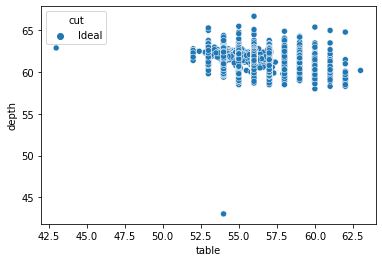

In [77]:
sns.scatterplot(x="table", y="depth", hue="cut", data=df_diamonds[df_diamonds['cut']=="Ideal"])

<AxesSubplot:xlabel='x', ylabel='y'>

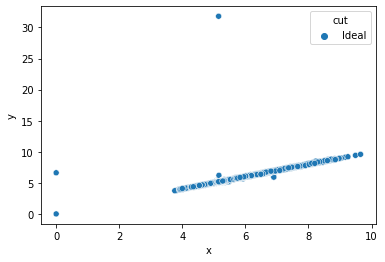

In [92]:
sns.scatterplot(x="x", y="y", hue="cut", data=df_diamonds[df_diamonds['cut']=="Ideal"])

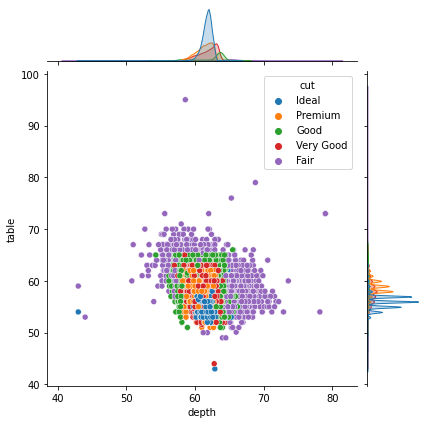

In [96]:
sns.jointplot(data=df_diamonds, x="depth", y="table", hue="cut")

In [173]:
df_diamonds['price_per_carat'] = df_diamonds['price'] / df_diamonds['carat']

Combination of Color,Cut,Clarity with median price 


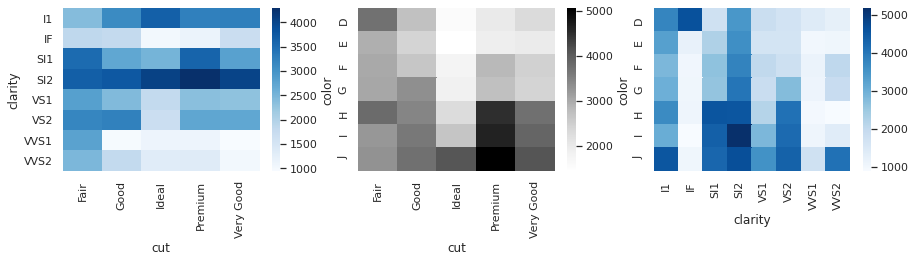

In [290]:
diamond=df_diamonds
cut_clarity=pd.pivot_table(diamond, values='price', columns='cut', index='clarity', aggfunc='median')
cut_color=pd.pivot_table(diamond, values='price', columns='cut', index='color', aggfunc='median')
clarity_color=pd.pivot_table(diamond, values='price', columns='clarity', index='color', aggfunc='median')

print("Combination of Color,Cut,Clarity with median price ")
plt.figure(figsize=(15,3))
plt.subplot(131)
sns.heatmap(cut_clarity,cmap='Blues')

plt.subplot(132)
sns.heatmap(cut_color,cmap='Greys')

plt.subplot(133)
sns.heatmap(clarity_color,cmap='Blues')
plt.show()

Combination of Color,Cut,Clarity with median price per carat 


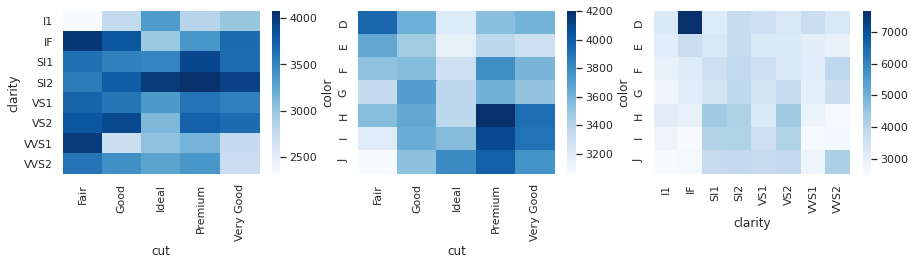

In [294]:
diamond=df_diamonds
cut_clarity=pd.pivot_table(diamond, values='price_per_carat', columns='cut', index='clarity', aggfunc='median')
cut_color=pd.pivot_table(diamond, values='price_per_carat', columns='cut', index='color', aggfunc='median')
clarity_color=pd.pivot_table(diamond, values='price_per_carat', columns='clarity', index='color', aggfunc='median')

print("Combination of Color,Cut,Clarity with median price per carat ")
plt.figure(figsize=(15,3))
plt.subplot(131)
sns.heatmap(cut_clarity,cmap='Blues')

plt.subplot(132)
sns.heatmap(cut_color,cmap='Blues')

plt.subplot(133)
sns.heatmap(clarity_color,cmap='Blues')
plt.show()

Combination of Color,Cut,Clarity with median carat 


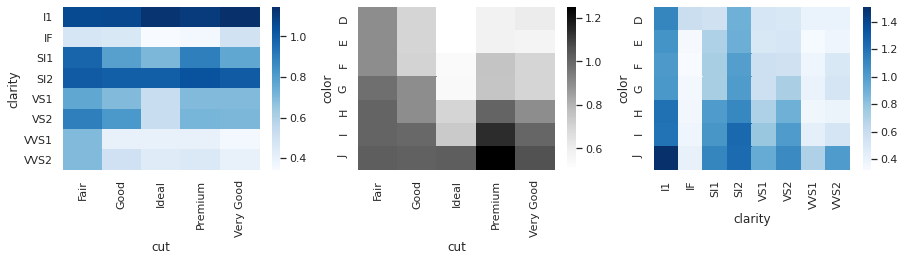

In [295]:
diamond=df_diamonds
cut_clarity=pd.pivot_table(diamond, values='carat', columns='cut', index='clarity', aggfunc='median')
cut_color=pd.pivot_table(diamond, values='carat', columns='cut', index='color', aggfunc='median')
clarity_color=pd.pivot_table(diamond, values='carat', columns='clarity', index='color', aggfunc='median')

print("Combination of Color,Cut,Clarity with median carat ")
plt.figure(figsize=(15,3))
plt.subplot(131)
sns.heatmap(cut_clarity,cmap='Blues')

plt.subplot(132)
sns.heatmap(cut_color,cmap='Greys')

plt.subplot(133)
sns.heatmap(clarity_color,cmap='Blues')
plt.show()

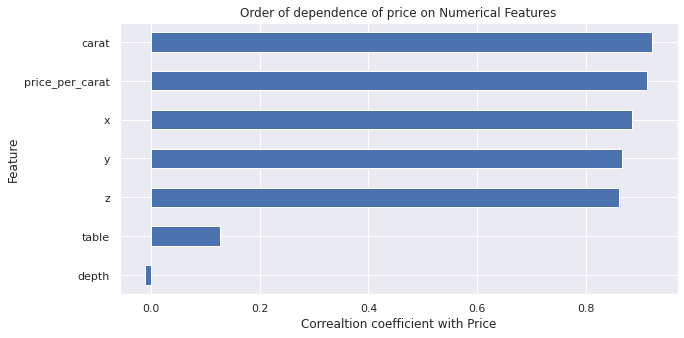

In [175]:
plt.figure(figsize=(10,5))
df_diamonds.corr()['price'].sort_values()[:-1].plot.barh()
plt.title('Order of dependence of price on Numerical Features')
plt.xlabel('Correaltion coefficient with Price')
plt.ylabel('Feature')
plt.show()

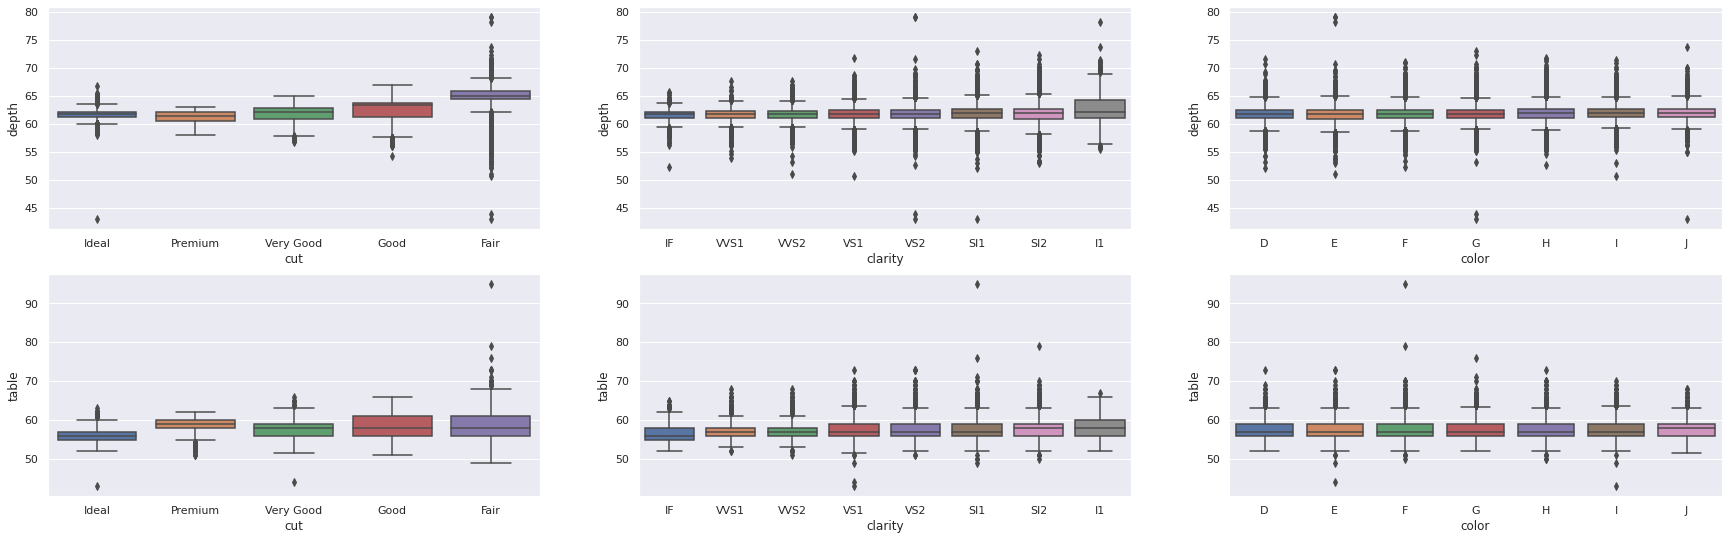

In [369]:
target_feature="price"
nrows, ncols = 2, 3
plt.figure(figsize=(30,9))
for i, row in enumerate(["depth","table"]):
    for j, col in enumerate(["cut","clarity","color"], 1):
        plt.subplot(nrows, ncols, (i*ncols) + j)
        sns.boxplot(data=df_diamonds, x=col, y=row, order=order[col])

### Regressão

In [456]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [446]:
df_diamonds['cut']=df_diamonds['cut'].map({'Ideal':5,'Good':4,'Very Good':3,'Premium':2, 'Fair':1})
df_diamonds['color']=df_diamonds['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df_diamonds['clarity']=df_diamonds['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2, 'I1':1})

In [447]:
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,4,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,2,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [448]:
X=df_diamonds.drop('price', axis=1)
y=df_diamonds['price']

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=1)

In [450]:
dataset_1=(X_train, X_test, y_train, y_test, 'dataset_1')

In [451]:
# Blank lists for all the details
model_=[]
cv_score_test=[]
cv_score_train=[]
mse_=[]
mae_=[]
rmse_=[]
r2_=[]

In [457]:
def run_model(model, dataset, modelname):
    model.fit(dataset[0], dataset[2])
    accuracies=cross_val_score(estimator=model, X=dataset[0], y=dataset[2], cv=5, verbose=1)
    y_pred=model.predict(dataset[1])
    print('')
    score_1=model.score(dataset[1], dataset[3])
    print(f'#### {modelname} ####')
    print("score :%.4f" %score_1)
    print(accuracies)
    
    
    mse=mean_squared_error(dataset[3], y_pred)
    mae=mean_absolute_error(dataset[3], y_pred)
    rmse=mean_squared_error(dataset[3], y_pred)**0.5
    r2=r2_score(dataset[3], y_pred)
    
    print('')
    print('MSE    : %0.2f ' % mse)
    print('MAE    : %0.2f ' % mae)
    print('RMSE   : %0.2f ' % rmse)
    print('R2     : %0.2f ' % r2)
    
    ## appending to the lists
    
    model_.append(modelname)
    cv_score_test.append(score_1)
    cv_score_train.append(np.mean(accuracies))
    mse_.append(mse)
    mae_.append(mae)
    rmse_.append(rmse)
    r2_.append(r2)

In [458]:
model_dict={'DecisionTreeRegressor': DecisionTreeRegressor(),
            'AdaBoostRegressor': AdaBoostRegressor(n_estimators=1000),
            'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=1000),
            'RandomForestRegressor': RandomForestRegressor(), 
           }

In [459]:
for models in model_dict:
    run_model(model_dict[models], dataset_1, models)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished



#### DecisionTreeRegressor ####
score :0.9658
[0.96431358 0.96442639 0.96323831 0.96477466 0.96313448]

MSE    : 530738.29 
MAE    : 357.97 
RMSE   : 728.52 
R2     : 0.97 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.1s finished



#### AdaBoostRegressor ####
score :0.9003
[0.89824931 0.90043269 0.9254031  0.87071451 0.91429447]

MSE    : 1548838.02 
MAE    : 1026.87 
RMSE   : 1244.52 
R2     : 0.90 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.6min finished



#### GradientBoostingRegressor ####
score :0.9818
[0.9811374  0.98056098 0.98206077 0.98120647 0.98162238]

MSE    : 282705.98 
MAE    : 279.50 
RMSE   : 531.70 
R2     : 0.98 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished



#### RandomForestRegressor ####
score :0.9818
[0.98068595 0.98061472 0.98191494 0.98006427 0.98140041]

MSE    : 283212.91 
MAE    : 263.06 
RMSE   : 532.18 
R2     : 0.98 


In [460]:
accuracy_data=pd.DataFrame(zip(model_, cv_score_test, cv_score_train, mse_, mae_, rmse_, r2_), columns=['Model', 'CV Test score', 'CV Train score (mean)', '%%SVGean Squared error', 'Mean Absolute error', 'Root Mean Squared error', 'R2 Score'])

In [461]:
accuracy_data

,Model,CV Test score,CV Train score (mean),%%SVGean Squared error,Mean Absolute error,Root Mean Squared error,R2 Score
0,DecisionTreeRegressor,0.965844,0.963977,5.307383e+05,357.971403,728.517870,0.965844
1,AdaBoostRegressor,0.900323,0.901819,1.548838e+06,1026.871379,1244.523212,0.900323
2,GradientBoostingRegressor,0.981806,0.981318,2.827060e+05,279.503566,531.701026,0.981806
3,RandomForestRegressor,0.981773,0.980936,2.832129e+05,263.059190,532.177522,0.981773
